In [5]:
!pip install opencv-python numpy torch torchvision
!pip install yolov5  # For YOLOv5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.0 MB/s eta 0:00:00
  

In [1]:
import torch
# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is a smaller version for faster inference


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-2-4 Python-3.11.11 torch-2.5.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 134MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-4 Python-3.11.11 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving 2018-dodge-demon-01-1024x681.jpg to 2018-dodge-demon-01-1024x681.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


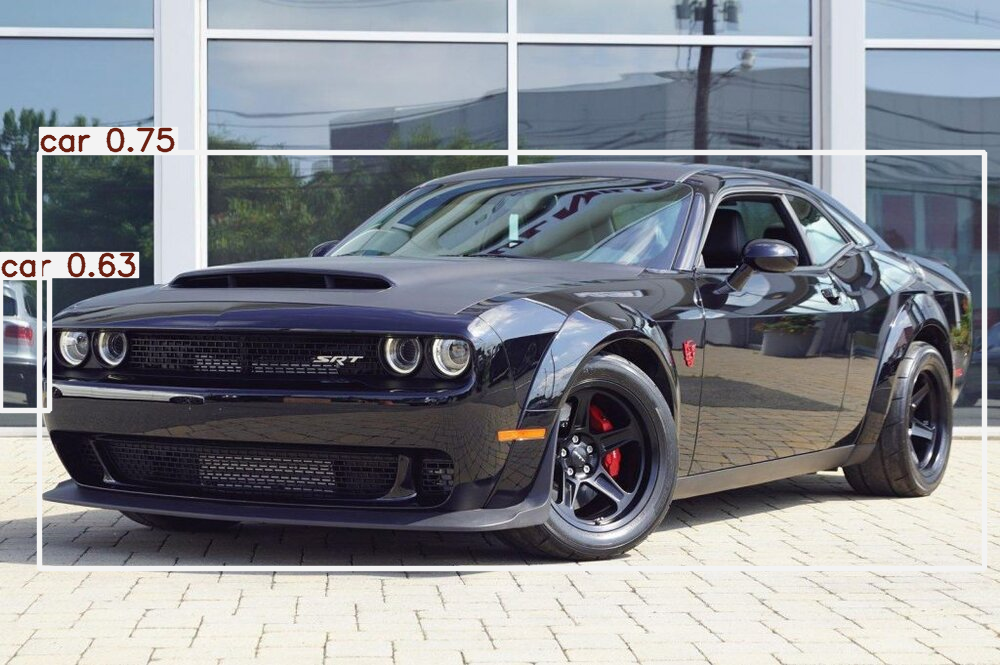

Saved 1 image to runs/detect/exp


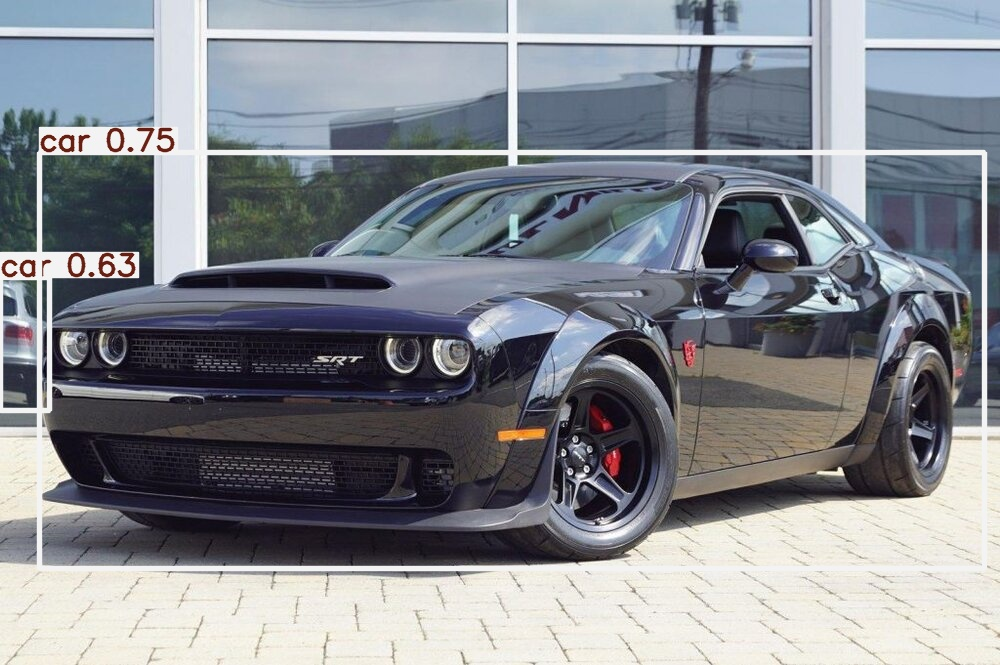

In [3]:
import torch
import cv2
from PIL import Image
import numpy as np
from io import BytesIO
from IPython.display import display, Image as IPImage
from google.colab import files

# Load YOLOv5 pre-trained model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is a smaller model for faster inference

# Function to upload an image in Google Colab
def upload_image():
    uploaded = files.upload()
    image_path = next(iter(uploaded))  # Get the file name of the uploaded image
    return image_path

# Function to perform object detection on the uploaded image
def detect_objects(image_path):
    # Load the image
    img = Image.open(image_path)

    # Perform inference
    results = model(img)

    # Show the results
    results.show()  # This will display the image with bounding boxes
    results.save()  # Save the results as a new image file (optional)

    # Get the image with bounding boxes from YOLO
    img_with_boxes = np.array(results.render()[0])

    # Convert BGR (OpenCV) to RGB (Pillow)
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    # Save the result image for display
    output_path = "/content/detected_image.jpg"
    cv2.imwrite(output_path, img_with_boxes)

    # Display the resulting image
    display(IPImage(output_path))

# Main code to run the script
if __name__ == "__main__":
    image_path = upload_image()  # Ask the user to upload an image file
    if image_path:
        detect_objects(image_path)  # Perform object detection on the uploaded image
    else:
        print("No file selected.")
